**Código realizado por:**\
Camilo José Sierra Otero\

# Punto 1
Cálculo de la densidad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_densidad(r,rho_0): #Función que permite calcular la densidad de un planeta

# Constantes planetarias de Júpiter necesarias para la función.

  a=69173000
  Rc=0.15*69173000 # (m)
  rho_c=10000

  densidad = np.where(r<=Rc,rho_c,(rho_0*(1-((r/a)**2)))) # En esta sección se hace uso de la función que permite calcular la densidad.
  return densidad

In [ ]:
step = 50   # numero de pasos de la función (a/step * n)
datos = np.zeros(step)
a = 69173000 # Radio final del calculo (m)

for i,j in enumerate(np.linspace(0,a,step)): # Función que permite calcular la densidad en función del radio tomando en cuenta el step.
  datos[i] = f_densidad(j,3000)

Text(0.5, 1.0, 'Radio  vs Densidad')

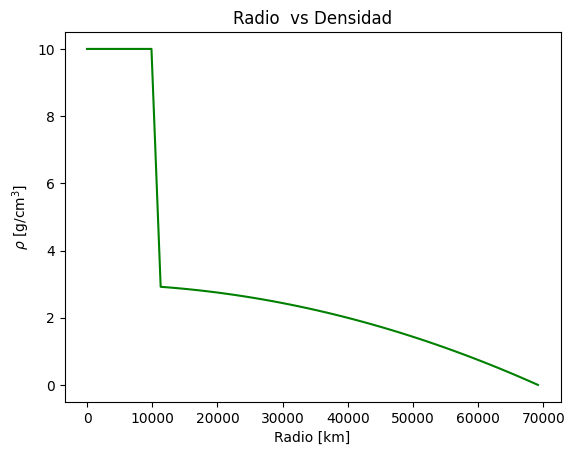

In [ ]:
# Graficar el radio vs la densidad de Júpiter

fig,ax=plt.subplots()

ax.plot(np.linspace(0,69173,step),datos/1000, color = 'green')
ax.set_xlabel("Radio [km]")
ax.set_ylabel(r"$\rho$ [g/cm$^3$]")
ax.set_title("Radio  vs Densidad")

## Punto 2
Cálculo de la masa a partir de la densidad

In [ ]:
# Utilizando la librería Scypy para realizar la integral y obtener la masa:
from scipy.integrate import quad

def integral(r): # Integrando en función del radio r de Júpiter.
  integrando = 4*np.pi*r**2*f_densidad(r,3000)
  return integrando

int_masa = quad(integral, 0, a) # Integral para determinar la masa usando la función quad (no es necesario definir error
                                # relativo ya que el por defecto es de 1.49e-8).
print(f'La masa de Júpiter obtenida con una densidad en la base del manto de 3000 kg/m3 es de: {int_masa[0]:.3e} kg')

La masa de Júpiter obtenida con una densidad en la base del manto de 3000 kg/m3 es de: 1.697e+27 kg


In [ ]:
# Al comparar los valores obtenidos de la masa de Júpiter obtenida con una densidad en la base del manto
# de 3000 kg/m3, nos podemos percatar que el valor está ampliamente desfasado de la magnitud real (1898e24)
# por lo cual variaremos la densidad del manto hasta obtener un valor aproximado.

def integral(r): # Integrando en función del radio r de Júpiter.
  integrando = 4*np.pi*r**2*f_densidad(r,3367)
  return integrando

int_masa = quad(integral, 0, a)

print(f'La masa de Júpiter obtenida con una densidad en la base del manto de 3367 kg/m3 es de: {int_masa[0]:.3e} kg')

La masa de Júpiter obtenida con una densidad en la base del manto de 3367 kg/m3 es de: 1.898e+27 kg


# Punto 3
Efectos de achatamiento producto de la rotación de planetas

In [ ]:
# Para realizar el presente punto se requiere del módulo legendre de la librería Scipy
from scipy.special import legendre

def R(theta): # Función que permite determinar la distancia desde el centro hasta un punto de la superficie
              # en base a la colatitud (theta).

  a = 69173000
  h_0 = 4638000
  R_theta = a*(1-((2/3)*(h_0/a)*legendre(2)(np.cos(np.radians(theta)))))
  return R_theta

# Obtención de resultados
step = 1
theta_max = 180 # El valor máximo de colatitud aceptada (180 equivale hasta el polo sur de Júpiter).
resultados = np.zeros(theta_max)

for i,j in enumerate(np.arange(0,theta_max,step)): # Esta función permite ángulos con un step de 1º.
  resultados[i] = R(j)

Text(0.5, 1.0, 'Colatitud vs R')

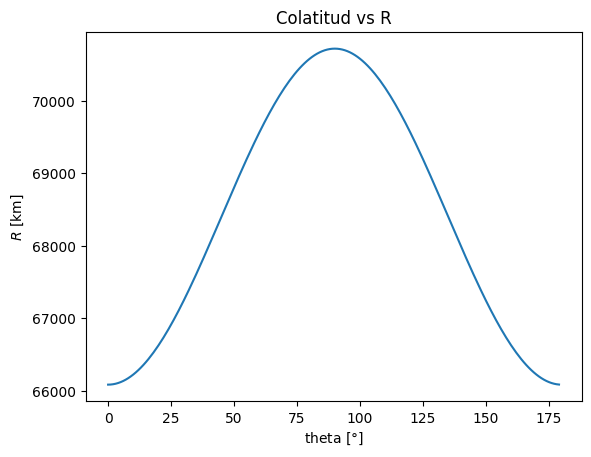

In [ ]:
# Gráfico Colatitud (theta) vs R

fig,ax=plt.subplots()

ax.plot(np.arange(0,180,step),resultados/1000)
ax.set_xlabel("theta [$\degree$]")
ax.set_ylabel(r"$R$ [km]")
ax.set_title("Colatitud vs R")

# Punto 4
Integral de momentos gravitacionales



Al considerar el planeta como una esfera completamente simetrica, el problema se puede simplificar en convertir la integral simple a una integral doble sobre un sistema de coordenadas esfericas dependiente de las variables θ y r donde la otra variable (ϕ en coordenadas esféricas) permanecerá como termino dependiente de las demás variables.

  $$
  J_{2 \ell}=-\frac{2\pi}{M a^{2 \ell}} \int_0^\pi  \int_0^{R(\theta)} r'^{2 \ell+2} P_{2 \ell}\left(\cos \theta^{\prime}\right)\sin\theta\;\rho\left(r^{\prime}\right) \;\mathrm{d}r\;\mathrm{d}\theta
  $$

La integral puede ser simplificada al asumir una forma completamente esférica, por lo cual la densidad estará exlusivamente limitada en función del radio y no de un ángulo θ y tal y como vimos anteriormente con la función del elipse oblato que ya fue descrita en el numeral previo. Para este caso los valores de a y $h_0$ estan fijos  siendo dependiente unicamente de la variacion de $\theta$, ergo, si introduciomos la variable  $\mu=\cos\theta$ entonces la funcion del elipse oblato puede ser escrita como:

  $$
  R(\theta) = a \left[1 - \frac{2}{3}\frac{h_0}{a} P_2(\mu)\right]
  $$

Además, despejando el diferencial:

$$
\mathrm{d}\mu = -sin(\theta)\mathrm{d}\theta
$$
$$
\mathrm{d}\theta = -\frac{\mathrm{d}\mu}{sin(\theta)}
$$

Es posible reescribir la expresión de R en términos de μ como:

  $$
  R(\theta) = a \left[1 - \frac{2}{3}\frac{h_0}{a} P_2(\mu)\right]
  $$

Evaluando los límites cuando μ es igual a cosθ, determinamos que la integral va de +1 a -1, pero por propiedades de las integrales, al estar multiplicada por un signo negativo producto del cambio de variable, es posible invertir el orden de los límites de forma que la primera integral oscila de -1 a 1 de forma que:

$$
\int_{1}^{-1}\int_0^{R(\mu)} f(x) = - \int_{-1}^{1}\int_0^{R(\mu)} f(x)
$$

Finalmente la integral haciendo el cambio de variable y la sustitución de los límites, puede ser expresada como:

  $$
  J_{2 \ell}=-\frac{2\pi}{M a^{2 \ell}} \int_{-1}^{+1}  \int_0^{R(\mu)} r'^{2 \ell+2} P_{2 \ell}(\mu)\rho\left(r^{\prime}\right) \;\mathrm{d}r\;\mathrm{d}\mu
  $$

# Punto 6
Variación de parámetros


In [ ]:
# PRIMER CASO

def f_densidad(r,rho_0,rho_c):

# Constantes planetarias de Júpiter necesarias para la función.

  a=69173000
  Rc=0.15*69173000 # (m)

  densidad = np.where(r<=Rc,rho_c,(rho_0*(1-((r/a)**2))))
  return densidad

################################################################

def integral(r): # Integrando en función del radio r de Júpiter.
  integrando = 4*np.pi*r**2*f_densidad(r,2600,100000)
  return integrando

int_masa = quad(integral, 0, a)

print(f'La masa de Júpiter obtenida con una densidad pc de 100000 kg/m3 y una densidad de manto de 2600 kg/m3 es de: {int_masa[0]:.3e} kg')

La masa de Júpiter obtenida con una densidad pc de 100000 kg/m3 y una densidad de manto de 2600 kg/m3 es de: 1.898e+27 kg


In [ ]:
# SEGUNDO CASO

def f_densidad(r,rho_0,rho_c):

# Constantes planetarias de Júpiter necesarias para la función.

  a=69173000
  Rc=0.15*69173000 # (m)

  densidad = np.where(r<=Rc,rho_c,(rho_0*(1-((r/a)**2))))
  return densidad

################################################################

def integral(r): # Integrando en función del radio r de Júpiter.
  integrando = 4*np.pi*r**2*f_densidad(r,3440,1500)
  return integrando

int_masa = quad(integral, 0, a)

print(f'La masa de Júpiter obtenida con una densidad pc de 1500 kg/m3 y una densidad de manto de 3440 kg/m3 es de: {int_masa[0]:.3e} kg')

La masa de Júpiter obtenida con una densidad pc de 1500 kg/m3 y una densidad de manto de 3440 kg/m3 es de: 1.899e+27 kg
